## **NarrationSystem**
EchoVision: An Intelligent Image Narration System for Accessibility Support.

### **Pre-Requisites**

In [90]:
!pip install transformers
!pip install Pillow
!pip install matplotlib
!pip install timm


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Import Statements**

In [91]:
from PIL import Image
import matplotlib.pyplot as plt #For Loading Image

from transformers import pipeline #For creating Pipelines(such as Object Detection, Text To Speech conversion)

from collections import defaultdict #To sort dictionary

from IPython.display import Audio as IPythonAudio #To Display Audio

### **Load Image**

In [119]:
traffic_img = Image.open("images/image_2.jpeg")

### **Object Detection**

In [120]:
# Object detection inference task
object_detection = pipeline(
    task="object-detection",
    model="facebook/detr-resnet-50",
)

# Pass the input to the pipeline
detections = object_detection(traffic_img)

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: facebook/detr-resnet-50
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


### **Sort Detections based their cound and Prepare a input Text for Text-To-Speech pipeline**

In [121]:
sorted_detections = defaultdict(list)
for detection in detections:
    sorted_detections[detection['label']].append(detection['score'])

#print(sorted_detections)

message = "We have" 
i=0;
for k,v in sorted_detections.items():
    if(i==len(sorted_detections.items())-1):
        if(len(v)>1):
            message = f"{message} and {len(v)} {k}'s "
        else:
            message = f"{message} and {len(v)} {k} "
    else:
        if(len(v)>1):
            message = f"{message} {len(v)} {k}'s, "
        else:
            message = f"{message} {len(v)} {k}, "
    i+=1
message +="in the given image"

#print(message)

### **Text To Speech**

In [122]:
narrator = pipeline(
    task="text-to-speech",
    model="suno/bark-small",
)

Loading weights:   0%|          | 0/542 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.1.weight to fine_acoustics.lm_heads.0.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.2.weight to fine_acoustics.lm_heads.1.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.3.weight to fine_acoustics.lm_heads.2.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_l

In [123]:
narrated_text = narrator(message, forward_params={"do_sample": True})

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
Both `max_new_tokens` (=768) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

### **Finally Display Input Image & Audio Output**

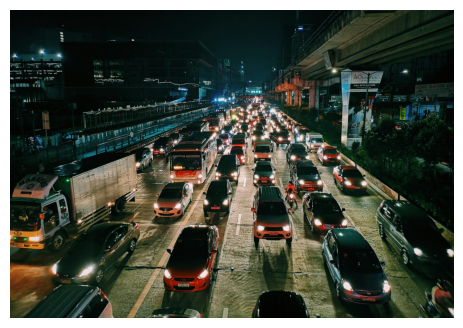

In [124]:
# Display the image using Matplotlib
plt.figure(figsize=(6, 4))
plt.imshow(traffic_img)
plt.axis('off')  # Hide the axes
plt.show()

#print(message)

#Audio
IPythonAudio(
    narrated_text["audio"],
    rate=narrated_text["sampling_rate"]
)